# Using logistic regression to identify heart disease in patients
In this project we will be using the Heart Disease Data Set from UCI (https://archive.ics.uci.edu/ml/datasets/Heart+Disease) to try and classify new patients into either of the following two categories:
* 0 - Absence of heart disease
* 1 - Presence of heart disease

We wil be using the logistic regression model with the lbfgs solver algorithm for classification.

Only 14 attributes are used as per UCI: 
1. (age): age in years 
2. (sex): sex (1 = male; 0 = female)  
3. (cp): chest pain type 
    *  Value 1: typical angina 
    *  Value 2: atypical angina 
    *  Value 3: non-anginal pain 
    *  Value 4: asymptomatic 
4. (trestbps): resting blood pressure (in mm Hg on admission to the hospital)  
5. (chol): serum cholestoral in mg/dl  
6. (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg): resting electrocardiographic results 
    *  Value 0: normal 
    *  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    *  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. (thalach): maximum heart rate achieved  
9. (exang): exercise induced angina (1 = yes; 0 = no) 
10. (oldpeak): ST depression induced by exercise relative to rest  
11. (slope): the slope of the peak exercise ST segment 
    *  Value 1: upsloping 
    *  Value 2: flat 
    *  Value 3: downsloping  
12. (ca): number of major vessels (0-3) colored by flourosopy 
13. (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (target)(the predicted attribute): diagnosis of heart disease (angiographic disease status) 
    *  Value 0: < 50% diameter narrowing 
    *  Value 1: > 50% diameter narrowing 
    
We will also be conducting a brief data analysis before applying our model. We will be specifically looking at the relationship between age and presence of heart disease and the relationship between gender and presence of heart disease.

In [1]:
# Getting started

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
data = pd.read_csv("/Users/krishnan/downloads/heart.csv")

In [2]:
# exploring the data
print(data.info())

# data cleaning
print(data.isnull().sum()) # no missing values so we can proceed to some data anaylsis



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       165 non-null    int64  
 1   sex       165 non-null    int64  
 2   cp        165 non-null    int64  
 3   trestbps  165 non-null    int64  
 4   chol      165 non-null    int64  
 5   fbs       165 non-null    int64  
 6   restecg   165 non-null    int64  
 7   thalach   165 non-null    int64  
 8   exang     165 non-null    int64  
 9   oldpeak   165 non-null    float64
 10  slope     165 non-null    int64  
 11  ca        165 non-null    int64  
 12  thal      165 non-null    int64  
 13  target    165 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 19.3 KB
None
1    56.363636
0    43.636364
Name: sex, dtype: float64


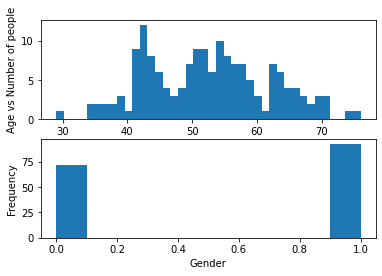

In [3]:
# We will be looking at the patients already diagnosed with a heart disease

diagnosed = data[data['target'] == 1]
print(diagnosed.info())

# inspect age and gender distributions
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

n, bins, patches = ax1.hist(diagnosed['age'], bins=40)
ax1.set_xlabel('Age')
ax1.set_ylabel('Age vs Number of people')

n, bins, patches = ax2.hist(diagnosed['sex'])
ax2.set_xlabel('Gender')
ax2.set_ylabel('Frequency')

# proprtion of males and females among the total number of diagnosed patients
print(pd.value_counts(diagnosed['sex'],normalize = True) * 100)

We can see that among the diagnosed patients, there is a peak in the numbeer of patients in their early 40s. We can also see that a heart disease is quite frequent among the 50-60 age group. There is again a small peak for patients in their early 60s.

From the gender frequency graph, we can see that the number of males diagnosed with a heart condition is is slighty more than the number of females. Roughly 56% of the diagnosed patients are men and 44% are women. However to get a better picture, we can calculate the proportion of males and females diagnosed with a heart disease. 

In [4]:
print(pd.value_counts(diagnosed['sex']))
print(pd.value_counts(data['sex']))

1    93
0    72
Name: sex, dtype: int64
1    207
0     96
Name: sex, dtype: int64


Therefore the proportion of males diagnosed with a heart consition from the total number of males:
=> (93/207)x100
=>  44.9%

The proportion of females diagnosed with a heart consition from the total number of females:
=> (72/96)x100
=>  75%

However, we cannot draw any conclusions about which gender group is likely to get a heart disease from the given data. This is becasue the total number of male patients in the data set is much more than that of female patients.

**We will now proceed to fitting the logistic regression model**

## Logistic Regression

In [5]:
# we will begin by identify categorical variables and changing their dtype
# sex, chestpain type(cp), restecg, exercise induced anigma (exang), slope, ca, thal are the categorical variables
catvariables = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in catvariables:
    data[col] = data[col].astype('category')

# we will now create dummies for the categorical variables
datacopy = data.copy()
for i in catvariables:
    dummy_df = pd.get_dummies(data[i], prefix = i)
    datacopy = datacopy.drop([i], axis = 1)
    datacopy = pd.concat([datacopy,dummy_df], axis = 1)
print(datacopy.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    int64  
 3   fbs        303 non-null    int64  
 4   thalach    303 non-null    int64  
 5   oldpeak    303 non-null    float64
 6   target     303 non-null    int64  
 7   sex_0      303 non-null    uint8  
 8   sex_1      303 non-null    uint8  
 9   cp_0       303 non-null    uint8  
 10  cp_1       303 non-null    uint8  
 11  cp_2       303 non-null    uint8  
 12  cp_3       303 non-null    uint8  
 13  restecg_0  303 non-null    uint8  
 14  restecg_1  303 non-null    uint8  
 15  restecg_2  303 non-null    uint8  
 16  exang_0    303 non-null    uint8  
 17  exang_1    303 non-null    uint8  
 18  slope_0    303 non-null    uint8  
 19  slope_1    303 non-null    uint8  
 20  slope_2   

### Train test (75/25 split)

In [6]:
# train test
final_data = datacopy.sample(frac = 1,random_state = 1).reset_index(drop = True)
train = final_data.iloc[0:227]
test = final_data.iloc[227:]

# we will include all the features for minimal bias error
features = list(final_data.columns)
features.remove('target')

# model fitting and testing
lr = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
lr.fit(train[features],train['target'])
labels = lr.predict(test[features])
labels = pd.DataFrame(labels, columns = ['label'])
test = test.reset_index()

predicted_test_table = pd.concat([test, labels], axis = 1)

# sensitivity (how good is the model in predicting the presence of a heart disease, TruePositive)
actual_correct = len(predicted_test_table[predicted_test_table["target"] == 1])
label_correct = len(predicted_test_table[(predicted_test_table["target"]==1) & (predicted_test_table['label']==1)])
txt = "Sensitivity is {num:.2f}"
print(txt.format(num = (label_correct/actual_correct)*100))

# specificity (how good is the model in predicting the absence of a heart disease, FalseNegative)
actual_wrong = len(predicted_test_table[predicted_test_table["target"]==0])
label_wrong = len(predicted_test_table[(predicted_test_table["target"]==0) & (predicted_test_table['label']==0)])
txt1 = "Specificity is {num1:.2f}"
print(txt1.format(num1 = (label_wrong/actual_wrong)*100))

Sensitivity is 95.74
Specificity is 89.66


This means that our model is good at correctly classifying a heart patient.
The fairly high specifity also means that the model can correctly identify a patient that doesn't have a heart diseases.

The model can be improved further by increasing the number of patient records and by including some more important attributes. We can also get data that equallly represents male and female population to correctly identify any underlying trends between gender group and presence of a heart condition.